# Preprocessing & Training

### Goal:
<p>Create a cleaned development dataset you can use to complete the modeling step of your project.</p>

### Steps:
<ul><li>Create dummy or indicator features for categorical variables</li><li>Standardize the magnitude of numeric features using a scaler</li><li>Split into testing and training datasets</li></ul>
Review the following questions and apply them to your dataset:<ul><li>Does my data set have any categorical data, such as Gender or day of the week?</li><li>Do my features have data values that range from 0 - 100 or 0-1 or both and more?  </li></ul>

In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

from library.sb_utils import save_file

In [2]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
adopted = pd.read_csv('data/cats_trimmed.csv')
adopted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489 entries, 0 to 6488
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   duration_as_adoptable  6489 non-null   float64
 1   age                    6489 non-null   object 
 2   breed_mixed            6489 non-null   bool   
 3   breed_primary          6489 non-null   object 
 4   city                   6489 non-null   object 
 5   coat                   6489 non-null   object 
 6   color_primary          6489 non-null   object 
 7   declawed               6489 non-null   bool   
 8   distance               6489 non-null   float64
 9   gender                 6489 non-null   object 
 10  goodwith_cats          6489 non-null   object 
 11  goodwith_children      6489 non-null   object 
 12  goodwith_dogs          6489 non-null   object 
 13  hasimage               6489 non-null   bool   
 14  hasvideo               6489 non-null   bool   
 15  hous

## Dummies!
### After converting bools to ints, of course

In [20]:
df = adopted
df.loc[:, ['breed_mixed', 'declawed', 'hasimage', 'hasvideo', 'house_trained', 'shots_current', 'spayed_neutered', 'special_needs']] = adopted.loc[:, ['breed_mixed', 'declawed', 'hasimage', 'hasvideo', 'house_trained', 'shots_current', 'spayed_neutered', 'special_needs']].astype('int64')
df = pd.get_dummies(df)

In [21]:
# drop one of each of the dummy category columns so those features don't double-weight anything
df.drop(['age_Senior', 'gender_Male', 'size_Extra Large', 'coat_Hairless', 'breed_primary_American Bobtail', 'color_primary_Tabby (Leopard / Spotted)', 'goodwith_children_False', 'goodwith_dogs_False', 'goodwith_cats_False', 'city_Lacey'], axis=1, inplace=True)

## Imputing Values

In [22]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed = imp.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)

## Scaling using StandardScaler()

In [23]:
X = df.drop(columns='duration_as_adoptable')
y = df.duration_as_adoptable

scaler = StandardScaler()
scaled = scaler.fit_transform(X)

In [24]:
scaled_X = pd.DataFrame(scaled, columns=X.columns)
scaled_X.describe()

,breed_mixed,declawed,distance,hasimage,hasvideo,house_trained,population,shots_current,spayed_neutered,special_needs,age_Adult,age_Baby,age_Young,breed_primary_Abyssinian,breed_primary_American Shorthair,breed_primary_Balinese,breed_primary_Bengal,breed_primary_Birman,breed_primary_Bombay,breed_primary_British Shorthair,breed_primary_Burmese,breed_primary_Calico,breed_primary_Chartreux,breed_primary_Devon Rex,breed_primary_Dilute Calico,breed_primary_Dilute Tortoiseshell,breed_primary_Domestic Long Hair,breed_primary_Domestic Medium Hair,breed_primary_Domestic Short Hair,breed_primary_Egyptian Mau,breed_primary_Exotic Shorthair,breed_primary_Extra-Toes Cat / Hemingway Polydactyl,breed_primary_Himalayan,breed_primary_Maine Coon,breed_primary_Manx,breed_primary_Munchkin,breed_primary_Norwegian Forest Cat,breed_primary_Persian,breed_primary_Pixiebob,breed_primary_Ragamuffin,breed_primary_Ragdoll,breed_primary_Russian Blue,breed_primary_Scottish Fold,breed_primary_Siamese,breed_primary_Silver,breed_primary_Singapura,breed_primary_Snowshoe,breed_primary_Tabby,breed_primary_Tiger,breed_primary_Tonkinese,breed_primary_Torbie,breed_primary_Tortoiseshell,breed_primary_Turkish Angora,breed_primary_Turkish Van,breed_primary_Tuxedo,city_Auburn,city_Bainbridge Island,city_Battle Ground,city_Bellingham,city_Bothell,city_Bremerton,city_Burlington,city_Chehalis,city_Chewelah,city_Coupeville,city_Des Moines,city_Everett,city_Federal Way,city_Ferndale,city_Friday Harbor,city_Kelso,city_Kennewick,city_Kirkland,city_La Center,city_Langley,city_Long Beach,city_Longview,city_Maple Valley,city_McKenna,city_Oakville,city_Ocean Shores,city_Olympia,city_Othello,city_Pasco,city_Port Angeles,city_Port Townsend,city_Pullman,city_Puyallup,city_Quilcene,city_Quincy,city_Raymond,city_Redmond,city_Republic,city_Roslyn,city_Seattle,city_Sequim,city_Spokane,city_Spokane Valley,city_Stanwood,city_Steilacoom,city_Sultan,city_Sumner,city_Tacoma,city_Vancouver,city_Washougal,city_West Richland,city_Woodinville,city_Yakima,coat_Long,coat_Medium,coat_Short,coat_unknown,color_primary_Black,color_primary_Black & White / Tuxedo,color_primary_Blue Cream,color_primary_Blue Point,color_primary_Brown / Chocolate,color_primary_Buff & White,color_primary_Buff / Tan / Fawn,color_primary_Calico,color_primary_Chocolate Point,color_primary_Cream / Ivory,color_primary_Cream Point,color_primary_Dilute Calico,color_primary_Dilute Tortoiseshell,color_primary_Flame Point,color_primary_Gray & White,color_primary_Gray / Blue / Silver,color_primary_Lilac Point,color_primary_Orange & White,color_primary_Orange / Red,color_primary_Seal Point,color_primary_Smoke,color_primary_Tabby (Brown / Chocolate),color_primary_Tabby (Buff / Tan / Fawn),color_primary_Tabby (Gray / Blue / Silver),color_primary_Tabby (Orange / Red),color_primary_Tabby (Tiger Striped),color_primary_Torbie,color_primary_Tortoiseshell,color_primary_White,color_primary_unknown,gender_Female,goodwith_cats_True,goodwith_cats_unknown,goodwith_children_True,goodwith_children_unknown,goodwith_dogs_True,goodwith_dogs_unknown,size_Large,size_Medium,size_Small
count,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,6489.00000,648

## Split into training and test sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=192)

In [26]:
X_train.shape, X_test.shape

((4542, 152), (1947, 152))

In [27]:
y_train.shape, y_test.shape

((4542,), (1947,))

In [28]:
# save training and test sets
datapath = 'data/tt_sets'
save_file(X_train, 'cats_X_train.csv', datapath)
save_file(X_test, 'cats_X_test.csv', datapath)
save_file(y_train, 'cats_y_train.csv', datapath)
save_file(y_test, 'cats_y_test.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "data/tt_sets/cats_X_train.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "data/tt_sets/cats_X_test.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "data/tt_sets/cats_y_train.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "data/tt_sets/cats_y_test.csv"


# Model Selection
### Goal: Build two to three different models and identify the best one.
<ul><li>Fit your models with a training dataset</li>
<li>Review model outcomes — Iterate over additional models as needed</li>
<li>Identify the final model that you think is the best model for this project</li></ul>
 Review the following questions and apply them to your analysis: 
<ul><li>Does my data involve a time series or forecasting? If so, am I splitting the train and test data appropriately?</li>
<li>Is my response variable continuous or categorical?</li></ul>

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

### RandomForestRegressor

In [31]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.7834377487297608

In [32]:
rf_cv = cross_validate(rf, X_train, y_train, cv=5)
rf_cv_scores_preopt = rf_cv['test_score']
rf_cv_scores_preopt

array([0.11047321, 0.06845203, 0.12230434, 0.0906218 , 0.14807579])

In [33]:
np.mean(rf_cv_scores_preopt), np.std(rf_cv_scores_preopt)

(0.10798543354812433, 0.027139796345526775)

In [34]:
rf_pred = rf.predict(X_test)
rmse_rf_preopt = np.sqrt(mean_squared_error(y_test, rf_pred))
print("RMSE : % f" %(rmse_rf_preopt))

RMSE :  34.484918


In [35]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
rf_grid_params = {
        'n_estimators': n_est,
        'max_depth': [1, 2, 3,4,5, 6,7,8,9, 10, None]
}

In [36]:
from sklearn.model_selection import GridSearchCV

gcv = GridSearchCV(rf, param_grid=rf_grid_params, cv=5, n_jobs=-1)
gcv.fit(X_train, y_train)
gcv_params = gcv.best_params_

gcv_params

{'max_depth': 10, 'n_estimators': 483}

In [37]:
rf = RandomForestRegressor(n_estimators=gcv_params['n_estimators'], max_depth=gcv_params['max_depth'])
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.41276733178513225

In [38]:
rf_cv_train = cross_validate(rf, X_train, y_train, cv=5)
rf_cv_test = cross_validate(rf, X_test, y_test, cv=5)
rf_cv_train['test_score'], rf_cv_test['test_score']

(array([0.16132885, 0.15848212, 0.17824084, 0.16251256, 0.18701481]),
 array([0.10848312, 0.12249882, 0.03004946, 0.07426636, 0.16343863]))

In [39]:
rf_train_score = np.mean(rf_cv_train['test_score'])
rf_test_score = np.mean(rf_cv_test['test_score'])

print("Average CV Score, Training Set:", rf_train_score)
print("Average CV Score, Trest Set:", rf_test_score)

Average CV Score, Training Set: 0.169515833380018
Average CV Score, Trest Set: 0.09974727908856088


In [40]:
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)
rf_rmse_train = np.sqrt(mean_squared_error(y_train, rf_train_pred))
rf_rmse_test = np.sqrt(mean_squared_error(y_test, rf_test_pred))
print("RMSE Training Set : % f" %(rf_rmse_train))
print("RMSE Test Set : % f" %(rf_rmse_test))

RMSE Training Set :  27.639140
RMSE Test Set :  32.258146


### GradientBoostingRegressor

In [41]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb.score(X_train, y_train)

0.31787013710575396

In [42]:
gb_cv = cross_validate(gb, X_train, y_train, cv=5)
gb_cv_scores_preopt = gb_cv['test_score']
gb_cv_scores_preopt

array([0.18879816, 0.18885649, 0.17443963, 0.18527858, 0.18758045])

In [43]:
np.mean(gb_cv_scores_preopt), np.std(gb_cv_scores_preopt)

(0.18499066139069795, 0.0054324192768760516)

In [44]:
gb_pred = gb.predict(X_test)
rmse_gb_preopt = np.sqrt(mean_squared_error(y_test, gb_pred))
print("RMSE : % f" %(rmse_gb_preopt))

RMSE :  32.233148


In [45]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
gb_grid_params = {
        'learning_rate': [.01, .1, 1],
        'n_estimators': n_est,
        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]
}

In [46]:
gb_grid_cv = GridSearchCV(gb, param_grid=gb_grid_params, cv=5, n_jobs=-1)
gb_grid_cv

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'n_estimators': [10, 12, 16, 20, 26, 33, 42, 54, 69,
                                          88, 112, 143, 183, 233, 297, 379, 483,
                                          615, 784, 1000]})

In [47]:
gb_grid_cv.fit(X_train, y_train)
gb_grid_cv_params = gb_grid_cv.best_params_

gb_grid_cv_params

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 297}

In [48]:
gb = GradientBoostingRegressor(n_estimators=gb_grid_cv_params['n_estimators'], max_depth=gb_grid_cv_params['max_depth'], learning_rate=gb_grid_cv_params['learning_rate'])
gb.fit(X_train, y_train)
gb.score(X_train, y_train)

0.31766102768246784

In [49]:
gb_cv_train = cross_validate(gb, X_train, y_train, cv=5)
gb_cv_test = cross_validate(gb, X_test, y_test, cv=5)
gb_cv_train['test_score'], gb_cv_test['test_score']

(array([0.19986593, 0.19291014, 0.18942762, 0.20295757, 0.20409606]),
 array([0.18935148, 0.12870794, 0.0390777 , 0.08299523, 0.17471592]))

In [50]:
gb_train_score = np.mean(gb_cv_train['test_score'])
gb_test_score = np.mean(gb_cv_test['test_score'])

print("Average CV Score, Training Set:", gb_train_score)
print("Average CV Score, Trest Set:", gb_test_score)

Average CV Score, Training Set: 0.19785146651482036
Average CV Score, Trest Set: 0.12296965192450933


In [51]:
gb_train_pred = gb.predict(X_train)
gb_test_pred = gb.predict(X_test)
gb_rmse_train = np.sqrt(mean_squared_error(y_train, gb_train_pred))
gb_rmse_test = np.sqrt(mean_squared_error(y_test, gb_test_pred))
print("RMSE Training Set : % f" %(gb_rmse_train))
print("RMSE Test Set : % f" %(gb_rmse_test))

RMSE Training Set :  29.793362
RMSE Test Set :  32.136544


### KNeighborsRegressor

In [52]:
kn = KNeighborsRegressor(n_neighbors=25, weights='distance')
kn.fit(X_train, y_train)
kn.score(X_train, y_train)

0.8760428716103522

In [53]:
kn_cv = cross_validate(kn, X_train, y_train, cv=5)
kn_cv_scores_preopt = kn_cv['test_score']
np.mean(kn_cv_scores_preopt), np.std(kn_cv_scores_preopt)

(0.08815071889321771, 0.018072258030583203)

In [54]:
kn_pred = kn.predict(X_test)
rmse_kn_preopt = np.sqrt(mean_squared_error(y_test, kn_pred))
print("RMSE : % f" %(rmse_kn_preopt))

RMSE :  34.766549


In [55]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
kn_grid_params = {
        'weights': ['uniform', 'distance'],
        'n_neighbors': n_est,
        'p': [1, 2]
}

In [56]:
kn_grid_cv = GridSearchCV(kn, param_grid=kn_grid_params, cv=5, n_jobs=-1)
kn_grid_cv.fit(X_train, y_train)
kn_grid_cv_params = kn_grid_cv.best_params_

kn_grid_cv_params

{'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}

In [57]:
kn = KNeighborsRegressor(n_neighbors=kn_grid_cv_params['n_neighbors'], weights=kn_grid_cv_params['weights'], p=kn_grid_cv_params['p'])
kn.fit(X_train, y_train)
kn.score(X_train, y_train)

0.2893853844980272

In [58]:
kn_cv_train = cross_validate(kn, X_train, y_train, cv=5)
kn_cv_test = cross_validate(kn, X_test, y_test, cv=5)
kn_cv_train['test_score'], kn_cv_test['test_score']

(array([0.12270817, 0.15985082, 0.15388799, 0.12599193, 0.15656884]),
 array([ 0.05678765, -0.00627876,  0.06919624,  0.00615119,  0.10881523]))

In [59]:
kn_train_score = np.mean(kn_cv_train['test_score'])
kn_test_score = np.mean(kn_cv_test['test_score'])

print("Average CV Score, Training Set:", kn_train_score)
print("Average CV Score, Trest Set:", kn_test_score)

Average CV Score, Training Set: 0.14380155080470985
Average CV Score, Trest Set: 0.04693430907128952


In [60]:
kn_train_pred = kn.predict(X_train)
kn_test_pred = kn.predict(X_test)
kn_rmse_train = np.sqrt(mean_squared_error(y_train, kn_train_pred))
kn_rmse_test = np.sqrt(mean_squared_error(y_test, kn_test_pred))
print("RMSE Training Set : % f" %(kn_rmse_train))
print("RMSE Test Set : % f" %(kn_rmse_test))

RMSE Training Set :  30.404404
RMSE Test Set :  33.158672


### XGBoost

In [61]:
xg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 50)
xg.fit(X_train, y_train)
xg.score(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.5458485737696644

In [62]:
xg_cv = cross_validate(xg, X_train, y_train, cv=5)
xg_cv_scores_preopt = xg_cv['test_score']
np.mean(xg_cv_scores_preopt), np.std(xg_cv_scores_preopt)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndar

(0.1560183163148017, 0.02676679102213811)

In [63]:
xg_pred = xg.predict(X_test)
rmse_xg_preopt = np.sqrt(mean_squared_error(y_test, xg_pred))
print("RMSE : % f" %(rmse_xg_preopt))

RMSE :  32.830385


/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [64]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
xg_grid_params = {
        'objective': ['reg:squarederror', 'reg:squaredlogerror', 'reg:logistic'],
        'n_estimators': n_est,
}

In [65]:
xg_grid_cv = GridSearchCV(xg, param_grid=xg_grid_params, cv=5, n_jobs=-1)
xg_grid_cv.fit(X_train, y_train)
xg_grid_cv_params = xg_grid_cv.best_params_

xg_grid_cv_params

{'n_estimators': 20, 'objective': 'reg:squarederror'}

In [66]:
xg = xgb.XGBRegressor(objective=xg_grid_cv_params['objective'], n_estimators = xg_grid_cv_params['n_estimators'])
xg.fit(X_train, y_train)
xg.score(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.4250868532823179

In [67]:
xg_cv_train = cross_validate(xg, X_train, y_train, cv=5)
xg_cv_test = cross_validate(xg, X_test, y_test, cv=5)
xg_cv_train['test_score'], xg_cv_test['test_score']

/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndar

(array([0.17946805, 0.16315177, 0.20408199, 0.15520235, 0.17521979]),
 array([0.15223908, 0.12042808, 0.00786487, 0.05927666, 0.17337777]))

In [68]:
xg_train_score = np.mean(xg_cv_train['test_score'])
xg_test_score = np.mean(xg_cv_test['test_score'])

print("Average CV Score, Training Set:", xg_train_score)
print("Average CV Score, Trest Set:", xg_test_score)

Average CV Score, Training Set: 0.17542478958428948
Average CV Score, Trest Set: 0.10263729281136572


In [69]:
xg_train_pred = xg.predict(X_train)
xg_test_pred = xg.predict(X_test)
xg_rmse_train = np.sqrt(mean_squared_error(y_train, xg_train_pred))
xg_rmse_test = np.sqrt(mean_squared_error(y_test, xg_test_pred))
print("RMSE Training Set : % f" %(xg_rmse_train))
print("RMSE Test Set : % f" %(xg_rmse_test))

RMSE Training Set :  27.347684
RMSE Test Set :  32.374172


/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## Model Comparisons

In [70]:
model_scores = pd.DataFrame({'CV Train': [np.mean(rf_train_score), np.mean(gb_train_score), np.mean(kn_train_score), np.mean(xg_train_score)], 'RMSE Train': [rf_rmse_train, gb_rmse_train, kn_rmse_train, xg_rmse_train],'CV Test': [np.mean(rf_test_score), np.mean(gb_test_score), np.mean(kn_test_score), np.mean(xg_test_score)], 'RMSE Test': [rf_rmse_test, gb_rmse_test, kn_rmse_test, xg_rmse_test]}, index=['RandomForest', 'GradientBoosting', 'KNNeighbors', 'XGBoost'])
model_scores

,CV Train,RMSE Train,CV Test,RMSE Test
RandomForest,0.16952,27.63914,0.09975,32.25815
GradientBoosting,0.19785,29.79336,0.12297,32.13654
KNNeighbors,0.14380,30.40440,0.04693,33.15867
XGBoost,0.17542,27.34768,0.10264,32.37417


In [71]:
print("Model with best CV Score: \nTrain:", model_scores['CV Train'].idxmin(), "\nTest:", model_scores['CV Test'].idxmin())
print("\nModel with best RMSE: \nTrain:", model_scores['RMSE Train'].idxmin(), "\nTest:", model_scores['RMSE Test'].idxmin())

Model with best CV Score: 
Train: KNNeighbors 
Test: KNNeighbors

Model with best RMSE: 
Train: XGBoost 
Test: GradientBoosting


In [72]:
models = ['RandomForest', 'GradientBoosting', 'KNNeighbors', 'XGBoost','RandomForest', 'GradientBoosting', 'KNNeighbors', 'XGBoost']
cv_scores_all = [np.mean(rf_train_score), np.mean(gb_train_score), np.mean(kn_train_score), np.mean(xg_train_score), np.mean(rf_test_score), np.mean(gb_test_score), np.mean(kn_test_score), np.mean(xg_test_score)]
types = ['train', 'train', 'train', 'train', 'test', 'test', 'test', 'test']
rmse_scores_all = [rf_rmse_train, gb_rmse_train, kn_rmse_train, xg_rmse_train, rf_rmse_test, gb_rmse_test, kn_rmse_test, xg_rmse_test]

cv_scores = pd.DataFrame(list(zip(models, cv_scores_all, types)), 
               columns =['Model', 'Scores', 'Type' ]) 
rmse_scores = pd.DataFrame(list(zip(models, rmse_scores_all, types)), 
               columns =['Model', 'Scores', 'Type' ]) 

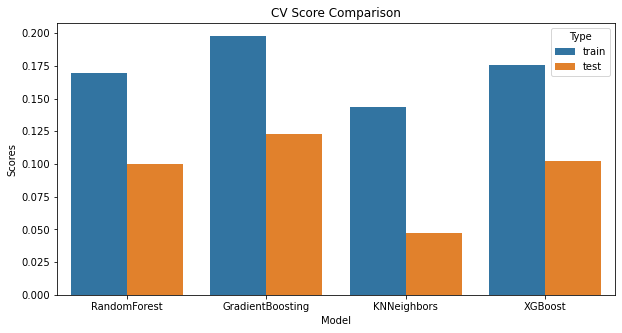

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.subplots(figsize=(10, 5))
sns.barplot(x='Model', y='Scores', hue='Type', data=cv_scores)
plt.title("CV Score Comparison")
plt.show()

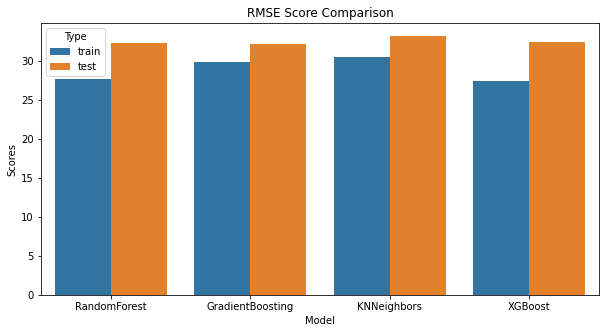

In [74]:
fig=plt.subplots(figsize=(10, 5))
sns.barplot(x='Model', y='Scores', hue='Type', data=rmse_scores)
plt.title("RMSE Score Comparison")
plt.show()

## Conclusion

I'm going to go forward with **GradientBoosting** for the cats data. I'm choosing this model because it has the best RMSE score for the test set.

In [75]:
std_test = np.std(y_test)
std_test

35.490261099806496

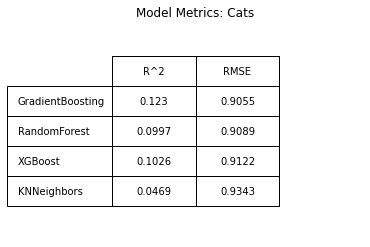

In [76]:
model_scores_test = model_scores.drop(columns=['CV Train','RMSE Train']).rename(columns={'CV Test':'R^2', 'RMSE Test':'RMSE'})

#standardize the RMSE by dividing it by the standard deviation of y_test
model_scores_test['RMSE'] = model_scores_test['RMSE']/std_test

#sort scores by lowest RMSE
model_scores_test.sort_values(by='RMSE', inplace=True)

fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')

table = ax.table(
    cellText=np.round(model_scores_test.values,4), 
    colLabels=model_scores_test.columns, 
    rowLabels=model_scores_test.index, 
    loc='center', 
    cellLoc='center'
)

table.scale(.5, 2.5)

plt.title('Model Metrics: Cats')

plt.show()

fig.savefig('assets/cats_model_metrics.png', bbox_inches="tight")
